In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import numpy as np
import re
import string
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import LabeledSentence
from gensim import utils
from nltk.corpus import stopwords


Mounted at /content/gdrive


In [14]:
def textClean(text):
    """
    Get rid of the non-letter and non-number characters
    """
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = text.lower().split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return (text)

def cleanup(text):
    text = textClean(text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

def constructLabeledSentences(data):
    sentences = []
    for index, row in data.iteritems():
        sentences.append(LabeledSentence(utils.to_unicode(row).split(), ['Text' + '_%s' % str(index)]))
    return sentences

In [15]:
def getEmbeddings(path,vector_dimension=300):
    """
    Generate Doc2Vec training and testing data
    """
    data = pd.read_csv(path)

    missing_rows = []
    for i in range(len(data)):
        if data.loc[i, 'text'] != data.loc[i, 'text']:
            missing_rows.append(i)
    data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

    for i in range(len(data)):
        data.loc[i, 'text'] = cleanup(data.loc[i,'text'])

    x = constructLabeledSentences(data['text'])
    y = data['label'].values

    text_model = Doc2Vec(min_count=1, window=5, vector_size=vector_dimension, sample=1e-4, negative=5, workers=7, epochs=10,
                         seed=1)
    text_model.build_vocab(x)
    text_model.train(x, total_examples=text_model.corpus_count, epochs=text_model.iter)

    train_size = int(0.8 * len(x))
    test_size = len(x) - train_size

    text_train_arrays = np.zeros((train_size, vector_dimension))
    text_test_arrays = np.zeros((test_size, vector_dimension))
    train_labels = np.zeros(train_size)
    test_labels = np.zeros(test_size)

    for i in range(train_size):
        text_train_arrays[i] = text_model.docvecs['Text_' + str(i)]
        train_labels[i] = y[i]

    j = 0
    for i in range(train_size, train_size + test_size):
        text_test_arrays[j] = text_model.docvecs['Text_' + str(i)]
        test_labels[j] = y[i]
        j = j + 1

    return text_train_arrays, text_test_arrays, train_labels, test_labels


def clean_data():
    """
    Generate processed string
    """
    #path = 'datasets/train.csv'
    vector_dimension=300

    data = pd.read_csv(path)

    missing_rows = []
    for i in range(len(data)):
        if data.loc[i, 'text'] != data.loc[i, 'text']:
            missing_rows.append(i)
    data = data.drop(missing_rows).reset_index().drop(['index','id'],axis=1)

    for i in range(len(data)):
        data.loc[i, 'text'] = cleanup(data.loc[i,'text'])

    data = data.sample(frac=1).reset_index(drop=True)

    x = data.loc[:,'text'].values
    y = data.loc[:,'label'].values

    train_size = int(0.8 * len(y))
    test_size = len(x) - train_size

    xtr = x[:train_size]
    xte = x[train_size:]
    ytr = y[:train_size]
    yte = y[train_size:]

    np.save('xtr_shuffled.npy',xtr)
    np.save('xte_shuffled.npy',xte)
    np.save('ytr_shuffled.npy',ytr)
    np.save('yte_shuffled.npy',yte)

In [ ]:
pip install scikit-plot


Accuracy = 91.57%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


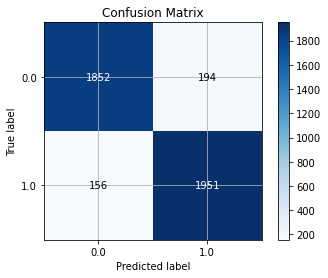

In [17]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt


clf = SVC()
clf.fit(xtr, ytr)
y_pred = clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()
    

Accuracy = 86.90%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


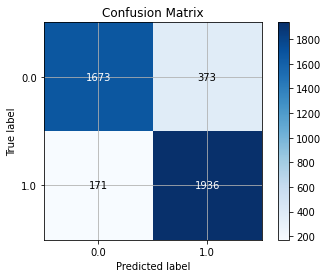

In [18]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.neighbors import KNeighborsClassifier as kn
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf = kn()
clf.fit(xtr, ytr)
y_pred = clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

Accuracy = 43.27%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


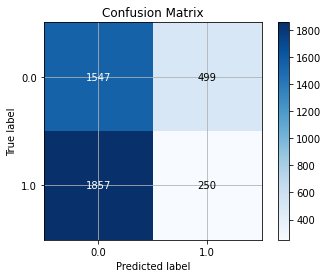

In [19]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.cluster import KMeans as KM
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf = KM(n_clusters=2,random_state=0).fit(xtr)
y_pred = clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 



'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

Accuracy = 89.89%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


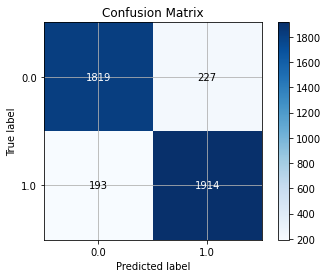

In [20]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.linear_model import SGDClassifier as gd
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf=gd()
clf.fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()


Accuracy = 78.33%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


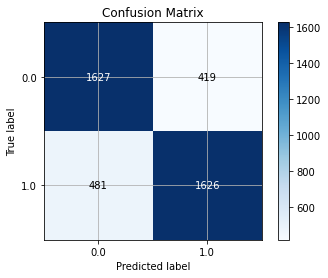

In [21]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn import tree
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf=tree.DecisionTreeClassifier()
clf.fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

Accuracy = 85.10%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


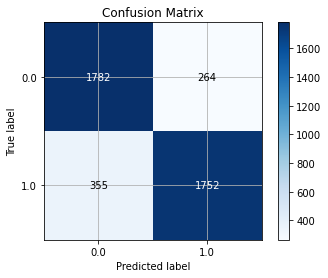

In [22]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
clf.fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

In [ ]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.linear_model import RidgeClassifier
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf=RidgeClassifier(solver='sparse_cg').fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

Iteration 1, loss = 0.75041490


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy = 49.27%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


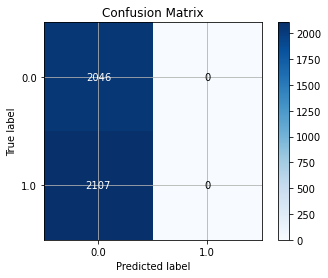

In [24]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf=MLPClassifier(hidden_layer_sizes=(1000,500,2),activation='tanh',solver='adam',learning_rate_init=0.0001,max_iter=20,tol=0.0000001,verbose=True).fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

In [25]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Accuracy = 72.29%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


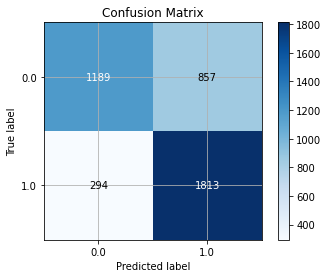

In [26]:
'''Naive Bayes'''
'Import required libraries'

from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import numpy as np
import scikitplot.plotters as skplt

'''Import Vector data'''
xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

model = GaussianNB()
model.fit(xtr, ytr)
y_pred = model.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

In [27]:
'''Import Data which converted into Vector'''

xtr=np.load('/content/gdrive/My Drive/Project/xtr.npy')
xte=np.load('/content/gdrive/My Drive/Project/xte.npy')
ytr=np.load('/content/gdrive/My Drive/Project/ytr.npy')
yte=np.load('/content/gdrive/My Drive/Project/yte.npy')

'''Importing required package'''
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xtr,ytr)
y_pred=clf.predict(xte)

m = yte.shape[0]
n = (yte != y_pred).sum()
print("Accuracy = " + format((m-n)/m*100, '.2f') + "%") 

'''Plotting confusion matrix'''
skplt.plot_confusion_matrix(yte,y_pred)
plt.show()

KeyboardInterrupt: ignored